In [26]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model , preprocessing
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('car.data')
df.head()


,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [28]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(df['buying']))
maint = le.fit_transform(list(df['maint']))
door = le.fit_transform(list(df['door']))
persons = le.fit_transform(list(df['persons']))
lug_boot = le.fit_transform(list(df['lug_boot']))
safety = le.fit_transform(list(df['safety']))
cls = le.fit_transform(list(df['class']))



In [29]:
predict = "class"

X = list(zip(buying,maint,door,persons,lug_boot,safety))

Y = list(cls)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [45]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.953757225433526

In [58]:
names = ['unacc', 'acc', 'good', 'vgood']
predicted = model.predict(x_test)

for x in range(len(predicted)):
    print("Predicted ", names[predicted[x]], " data is ", names[predicted[x]]," actual is ", names[y_test[x]])
    n = model.kneighbors([x_test[x]], 7, True)
    print("N:" , n)

Predicted  acc  data is  acc  actual is  acc
N: (array([[1., 1., 1., 1., 1., 1., 1.]]), array([[1194,  672,  464, 1553,  293,  289,  435]], dtype=int64))
Predicted  good  data is  good  actual is  unacc
N: (array([[1., 1., 1., 1., 1., 1., 1.]]), array([[1085, 1000,   58,  109,   36, 1311,  488]], dtype=int64))
Predicted  good  data is  good  actual is  good
N: (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356]]), array([[1120, 1119,  360,  652,  987,  865,  599]], dtype=int64))
Predicted  good  data is  good  actual is  good
N: (array([[1., 1., 1., 1., 1., 1., 1.]]), array([[1493, 1412, 1512, 1227,  989, 1333, 1056]], dtype=int64))
Predicted  good  data is  good  actual is  good
N: (array([[1., 1., 1., 1., 1., 1., 1.]]), array([[ 669,  763,   97,  102,  225, 1185, 1286]], dtype=int64))
Predicted  unacc  data is  unacc  actual is  unacc
N: (array([[1.        , 1.        , 1.        , 1.        , 1.41421356,
        1.41421356, 1.41421356

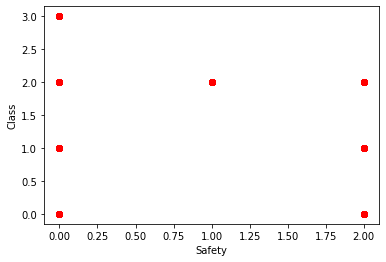

In [72]:
plt.scatter(safety, cls, color='red')
plt.xlabel('Safety')
plt.ylabel('Class')
plt.show()